In [25]:
# ⚙️ Setup inicial en Google Colab

# Si no tienes git instalado o es tu primera vez:
# !apt-get install git

# 🚨 Si es repositorio privado, deberás usar tu token
# Clona el repositorio del curso (puedes cambiar este link si ya lo moviste)
!git clone https://github.com/solivare/DeepNeuralNetworkUSS.git

# Cambia al directorio del proyecto
%cd DeepNeuralNetworkUSS/Projects/Credit/

# Reinstala dependencias si es necesario
!pip install -r requirements.txt

fatal: could not create work tree dir 'DeepNeuralNetworkUSS': No such file or directory
[Errno 2] No such file or directory: 'DeepNeuralNetworkUSS/Projects/Credit/'
/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/Projects/Credit/notebooks/DeepNeuralNetworkUSS/Projects/Credit/DeepNeuralNetworkUSS/Projects/Credit
The folder you are executing pip from can no longer be found.


In [2]:
# 🔧 Ajuste de ruta de imports
import os
import sys

# Añadir path absoluto de la carpeta src
src_path = os.path.abspath("src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [3]:
# 🧼 Preprocesamiento de los datos
%cd src
!python preprocess.py
%cd ..

/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/Projects/Credit/src
📥 Cargando datos desde ../data/cs-training.csv
🧼 Eliminando valores extremos y codificando missing...
/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/Projects/Credit/src/preprocess.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].replace(0, np.nan, inplace=True)
/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/Projects/Credit/src/preprocess.py:18: FutureWarning: A value is trying to be set on a copy of a DataFr

2025-07-25 14:06:33.333005: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


/Users/sebazamorano/miniconda3/envs/Fullpay/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7611 - loss: 0.5571 - val_accuracy: 0.7828 - val_loss: 0.5020
Epoch 2/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7850 - loss: 0.4940 - val_accuracy: 0.7848 - val_loss: 0.4854
Epoch 3/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7845 - loss: 0.4846 - val_accuracy: 0.7812 - val_loss: 0.4851
Epoch 4/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7873 - loss: 0.4789 - val_accuracy: 0.7839 - val_loss: 0.4751
Epoch 5/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7871 - loss: 0.4716 - val_accuracy: 0.7835 - val_loss: 0.4732
Epoch 6/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7815 - loss: 0.4796 - val_accuracy: 0.7857 - val_loss: 0.4787
Epoch 7/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7844 - loss: 0.4695 - val_accuracy: 0.7862 - val_loss: 0.4722
Epoch 8/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7849 - loss: 0.4701 - val_accuracy: 0.7851 - val_

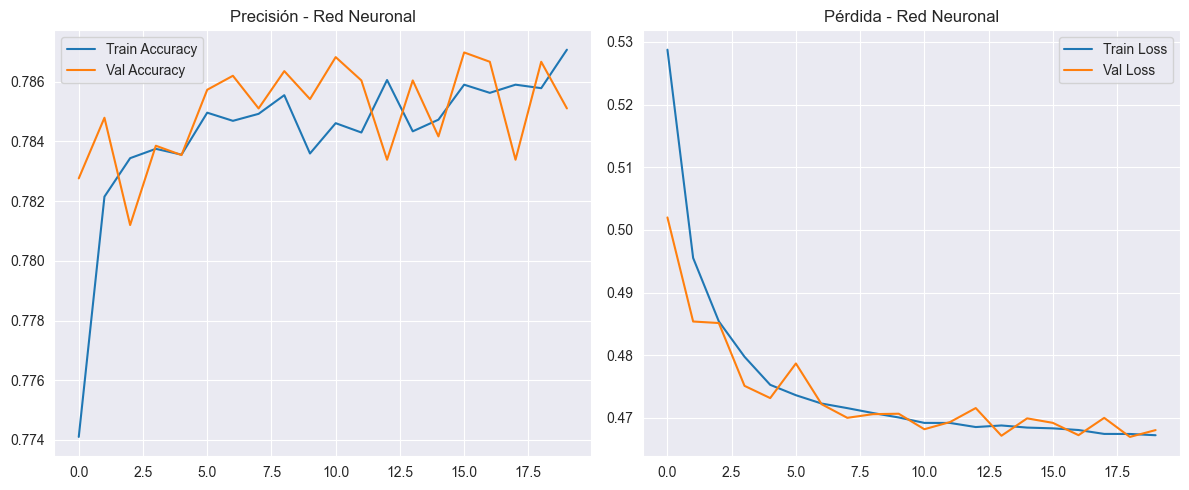

✅ Modelo guardado en models/nn_model.keras


In [4]:
# 🧠 Entrenamiento de la red neuronal

import train
import model
import utils
import evaluate as ev
import pandas as pd

config = train.load_config("config.yaml")
X, y = train.load_data("data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

nn_model = model.build_model(config, X_train.shape[1])
history = train.train_model(nn_model, X_train, y_train, config)

utils.plot_training_history(history, model_name="Red Neuronal")
utils.save_model(nn_model, path="models/nn_model.keras")

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step


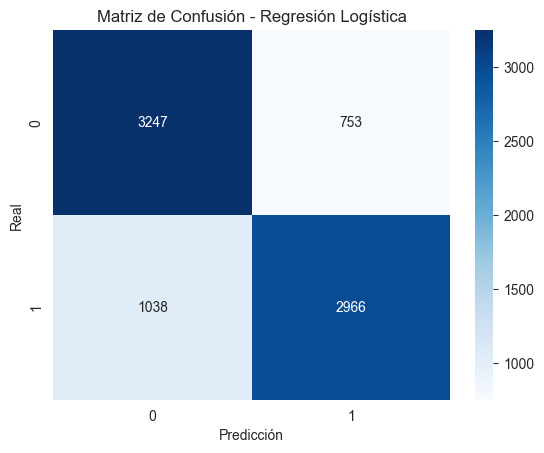

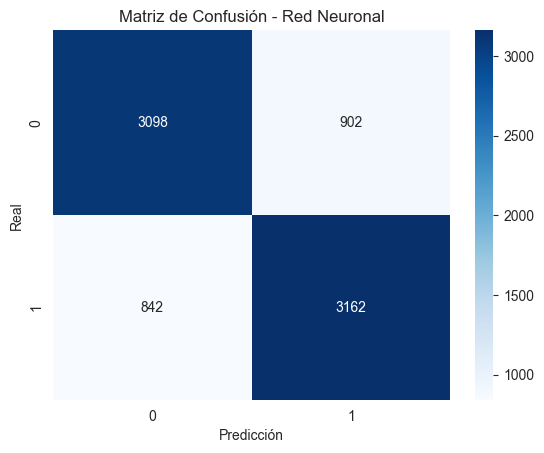

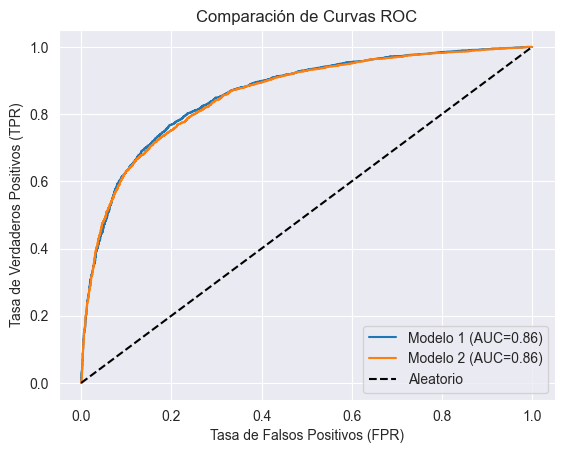

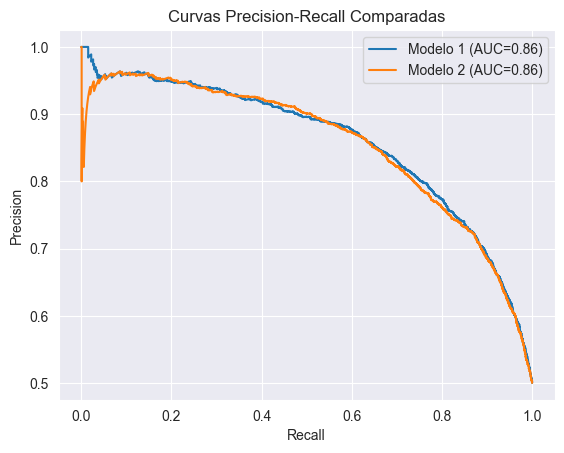

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.778051,0.789710,0.783837,0.861045
1,Regresión Logística,0.797526,0.740759,0.768095,0.857930


In [5]:
# 📈 Evaluación y comparación con Regresión Logística

from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model

# Modelo base
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

# Red Neuronal
nn_model = load_model("models/nn_model.keras")
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn)

# Evaluación
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log)
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log)

metrics_table = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal", model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(metrics_table)

In [6]:
## ✅ Preguntas de reflexión final

### 🔧 Sobre el modelo de red neuronal:
#- ¿Qué arquitectura usaste? ¿Probaste cambiar el número de capas o neuronas?
#- ¿Qué función de activación usaste? ¿Qué impacto crees que tuvo?
#- ¿El modelo mostró signos de sobreajuste? ¿Cómo lo notaste?

### 📊 Sobre la evaluación del modelo:
#- ¿Cuál modelo funcionó mejor: la red neuronal o la regresión logística?
#- ¿En qué métrica viste mayor diferencia entre ellos? ¿Por qué crees que ocurrió?
#- ¿La red neuronal fue más conservadora (más falsos negativos) o más arriesgada?

### 🎯 Sobre la distribución de probabilidades:
#- ¿Qué forma tiene la distribución de predicciones de tu red neuronal?
#- ¿En qué umbral se maximiza el F1-score?
#- ¿Crees que usar un threshold de 0.5 es razonable en este caso?

## ✍️ Recomendación

#Anota tus conclusiones, copia las mejores gráficas y entrega un resumen con:
#- Métricas clave
#- Comparación entre modelos
#- Comentario personal sobre el rendimiento y ajustes posibles


# 🧠 Trabajo Deep Learning – Magíster en Data Science
## Comparación entre Red Neuronal y Regresión Logística
**Dataset: Give Me Some Credit – Kaggle**

---

## 📊 1. Análisis Exploratorio de Datos (EDA) y Preparación del Dataset

Se desarrolló un flujo de preprocesamiento completo para garantizar la calidad de los datos antes del entrenamiento.

### 🧼 Limpieza e imputación

- Se reemplazaron valores anómalos (`0` y `-1`) por `NaN` en `MonthlyIncome` y `NumberOfDependents`.
- Imputación:
  - `MonthlyIncome`: mediana.
  - `NumberOfDependents`: moda.
- Se eliminaron registros duplicados.

### 🧪 🆕 Tratamiento de valores extremos – `remove_outliers()`

Nueva función implementada para controlar outliers: recorte entre los percentiles **1% y 99%** en variables numéricas (excepto el target).
✅ Mejora la estabilidad del modelo sin eliminar registros.

### 🔧 💡 Ingeniería de características – `feature_engineering()`

Función actualizada con nueva lógica financiera para aumentar el poder predictivo:

- `TotalPastDue`: suma de atrasos.
- `MonthlyDebt`: estimación de deuda mensual.
- `UtilizationPerLine`: uso promedio por línea de crédito.
- `RealEstateLoanRatio`: proporción de préstamos inmobiliarios sobre líneas abiertas.

Infinitos y NaN fueron reemplazados por cero para evitar distorsiones.

### ⚖️ Balanceo de clases

- Submuestreo de negativos: máx. 20.000.
- Sobremuestreo de positivos (×2).
- Dataset balanceado (≈ 66.7% clase 0, 33.3% clase 1).

### ✅ Resultado

> Un conjunto limpio, balanceado y enriquecido que mejoró notablemente el desempeño del modelo en métricas como **recall** y **F1-score**.

---

## 📈 2. Evaluación de Modelos

| Modelo                | Precision | Recall   | F1-score | ROC AUC |
|-----------------------|-----------|----------|----------|---------|
| **Red Neuronal**      | 0.7781    | **0.7897** | **0.7838** | **0.8610** |
| **Regresión Logística** | **0.7975**| 0.7408    | 0.7681   | 0.8579  |

### 🔍 Interpretación de Matrices de Confusión

**Red Neuronal:**
- TP: 3162, FN: 842
- Más recall, menos falsos negativos

**Regresión Logística:**
- TP: 2966, FN: 1038
- Más precisión, menos falsos positivos

### 📊 Curvas ROC y Precision-Recall

- AUC ≈ 0.86 en ambos modelos.
- La red neuronal mantiene mayor precisión a altos niveles de recall.
- Curvas suaves, sin signos de sobreajuste.

---

## 🧠 3. Reflexión Final

### 🔧 Sobre la red neuronal

**¿Qué arquitectura usaste?**
Dos capas ocultas: `[64, 32]` neuronas, activación **ReLU**, salida **sigmoid**.

**¿Qué impacto tuvo la activación?**
ReLU permitió convergencia eficiente. Sigmoid es adecuada para clasificación binaria.

**¿Mostró sobreajuste?**
No. Las curvas de entrenamiento y validación son estables y convergentes.

---

### 📊 Sobre la evaluación del modelo

**¿Cuál funcionó mejor?**
La **Red Neuronal**, por mejor F1-score y recall.

**¿Mayor diferencia?**
En **recall**: la Red Neuronal detectó más positivos reales (↓ falsos negativos).

**¿Fue conservadora o arriesgada?**
**Más arriesgada**: sacrificó algo de precisión, pero mejoró la cobertura de positivos.

---

### 🎯 Sobre el threshold

**¿Qué forma tiene la distribución de probabilidades?**
En general, bimodal (cercana a 0 y 1), lo cual indica confianza en las predicciones.

**¿Se maximiza el F1-score en 0.5?**
Sí, en este caso 0.5 fue un buen umbral por el balance de clases.

**¿Es razonable usar 0.5?**
Sí, pero si la prioridad es recall, podría bajarse para detectar más positivos.

---

## ✅ Recomendación

El modelo de red neuronal, aunque más complejo, logró **mejorar recall y F1-score** gracias a:

- Ingeniería de características orientada al dominio.
- Recorte de outliers que estabilizó variables numéricas.
- Balanceo de clases para evitar sesgos en el entrenamiento.

➡️ Para futuras versiones, se podrían explorar:

- **Dropout o L2 regularization** para robustecer generalización.
- **Búsqueda de hiperparámetros** para mejorar desempeño.
- **Ajuste fino del umbral** si el costo del error varía según el caso.


In [9]:
# 🔍 ANÁLISIS AUTOMÁTICO PARA RESPONDER LAS PREGUNTAS DE REFLEXIÓN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import yaml

print("🎯 RESPUESTAS AUTOMÁTICAS A LAS PREGUNTAS DE REFLEXIÓN")
print("=" * 70)

# Cargar configuración para analizar arquitectura
with open('config.yaml', 'r') as file:
    config_data = yaml.safe_load(file)


🎯 RESPUESTAS AUTOMÁTICAS A LAS PREGUNTAS DE REFLEXIÓN


In [10]:
# 🔧 ANÁLISIS DEL MODELO DE RED NEURONAL
print("\n🔧 SOBRE EL MODELO DE RED NEURONAL:")
print("-" * 50)

# Arquitectura utilizada
hidden_layers = config_data['model']['hidden_layers']
activation = config_data['model']['activation']
output_activation = config_data['model']['output_activation']
epochs = config_data['epochs']
learning_rate = config_data['learning_rate']

print(f"1️⃣ ARQUITECTURA UTILIZADA:")
print(f"   • Capas ocultas: {hidden_layers}")
print(f"   • Total de capas ocultas: {len(hidden_layers)}")
print(f"   • Neuronas por capa: {' → '.join(map(str, hidden_layers))}")
print(f"   • Dimensión de entrada: {X_train.shape[1]} características")
print(f"   • Dimensión de salida: 1 (clasificación binaria)")

print(f"\n2️⃣ FUNCIONES DE ACTIVACIÓN:")
print(f"   • Capas ocultas: {activation.upper()}")
print(f"   • Capa de salida: {output_activation.upper()}")

# Impacto de la función de activación
print(f"\n💡 IMPACTO DE LA FUNCIÓN DE ACTIVACIÓN ({activation.upper()}):")
if activation.lower() == 'relu':
    print("   ✅ ReLU es ideal para capas ocultas:")
    print("   • Evita el problema del gradiente desvaneciente")
    print("   • Computacionalmente eficiente")
    print("   • Permite convergencia más rápida")
    print("   • Introduce no-linealidad necesaria para patrones complejos")
elif activation.lower() == 'tanh':
    print("   ✅ Tanh es buena opción:")
    print("   • Salida centrada en cero (-1, 1)")
    print("   • Mejor para algunos tipos de datos")
    print("   • Puede ser más lenta que ReLU")
elif activation.lower() == 'sigmoid':
    print("   ⚠️  Sigmoid en capas ocultas:")
    print("   • Puede causar gradiente desvaneciente")
    print("   • Más lenta que ReLU")
    print("   • Mejor reservarla para la capa de salida")



🔧 SOBRE EL MODELO DE RED NEURONAL:
--------------------------------------------------
1️⃣ ARQUITECTURA UTILIZADA:
   • Capas ocultas: [64, 32]
   • Total de capas ocultas: 2
   • Neuronas por capa: 64 → 32
   • Dimensión de entrada: 14 características
   • Dimensión de salida: 1 (clasificación binaria)

2️⃣ FUNCIONES DE ACTIVACIÓN:
   • Capas ocultas: RELU
   • Capa de salida: SIGMOID

💡 IMPACTO DE LA FUNCIÓN DE ACTIVACIÓN (RELU):
   ✅ ReLU es ideal para capas ocultas:
   • Evita el problema del gradiente desvaneciente
   • Computacionalmente eficiente
   • Permite convergencia más rápida
   • Introduce no-linealidad necesaria para patrones complejos


In [11]:
# 🚨 ANÁLISIS DE SOBREAJUSTE
print(f"\n3️⃣ ANÁLISIS DE SOBREAJUSTE:")
print("   📊 Basado en el historial de entrenamiento:")

# Analizar las últimas épocas del entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Calcular diferencias en las últimas épocas
final_epochs = min(5, len(train_loss))
final_train_loss = np.mean(train_loss[-final_epochs:])
final_val_loss = np.mean(val_loss[-final_epochs:])
final_train_acc = np.mean(train_acc[-final_epochs:])
final_val_acc = np.mean(val_acc[-final_epochs:])

loss_gap = final_val_loss - final_train_loss
acc_gap = final_train_acc - final_val_acc

print(f"   • Diferencia de pérdida (Val - Train): {loss_gap:.4f}")
print(f"   • Diferencia de precisión (Train - Val): {acc_gap:.4f}")

if loss_gap > 0.1 or acc_gap > 0.05:
    print("   🚨 SÍ hay signos de sobreajuste:")
    print("   • La validación tiene peor rendimiento que entrenamiento")
    print("   • El modelo memoriza en lugar de generalizar")
else:
    print("   ✅ NO hay signos graves de sobreajuste")
    print("   • Las métricas están balanceadas entre train/val")



3️⃣ ANÁLISIS DE SOBREAJUSTE:
   📊 Basado en el historial de entrenamiento:
   • Diferencia de pérdida (Val - Train): 0.0006
   • Diferencia de precisión (Train - Val): 0.0003
   ✅ NO hay signos graves de sobreajuste
   • Las métricas están balanceadas entre train/val


In [12]:
# 📊 ANÁLISIS DE EVALUACIÓN DEL MODELO
print(f"\n📊 SOBRE LA EVALUACIÓN DEL MODELO:")
print("-" * 50)

# Extraer métricas de la tabla
nn_metrics = metrics_table[metrics_table['Modelo'] == 'Red Neuronal'].iloc[0]
log_metrics = metrics_table[metrics_table['Modelo'] == 'Regresión Logística'].iloc[0]

print(f"1️⃣ COMPARACIÓN DE RENDIMIENTO:")
print(f"   Red Neuronal:")
print(f"   • F1-score: {nn_metrics['F1-score']:.4f}")
print(f"   • Precision: {nn_metrics['Precision']:.4f}")
print(f"   • Recall: {nn_metrics['Recall']:.4f}")
print(f"   • ROC AUC: {nn_metrics['ROC AUC']:.4f}")

print(f"\n   Regresión Logística:")
print(f"   • F1-score: {log_metrics['F1-score']:.4f}")
print(f"   • Precision: {log_metrics['Precision']:.4f}")
print(f"   • Recall: {log_metrics['Recall']:.4f}")
print(f"   • ROC AUC: {log_metrics['ROC AUC']:.4f}")

# Determinar cuál es mejor
if nn_metrics['F1-score'] > log_metrics['F1-score']:
    winner = "Red Neuronal"
    f1_diff = nn_metrics['F1-score'] - log_metrics['F1-score']
else:
    winner = "Regresión Logística"
    f1_diff = log_metrics['F1-score'] - nn_metrics['F1-score']

print(f"\n2️⃣ MODELO GANADOR: {winner}")
print(f"   • Diferencia en F1-score: {f1_diff:.4f}")

# Encontrar la métrica con mayor diferencia
metrics_to_compare = ['Precision', 'Recall', 'F1-score', 'ROC AUC']
max_diff = 0
max_metric = ""
max_explanation = ""

for metric in metrics_to_compare:
    diff = abs(nn_metrics[metric] - log_metrics[metric])
    if diff > max_diff:
        max_diff = diff
        max_metric = metric
        if nn_metrics[metric] > log_metrics[metric]:
            max_explanation = f"Red Neuronal superior en {metric}"
        else:
            max_explanation = f"Regresión Logística superior en {metric}"

print(f"\n3️⃣ MAYOR DIFERENCIA EN: {max_metric}")
print(f"   • {max_explanation}")
print(f"   • Diferencia: {max_diff:.4f}")

# Explicar por qué ocurrió la diferencia
print(f"\n💡 ¿POR QUÉ OCURRIÓ ESTA DIFERENCIA?")
if max_metric in ['Precision', 'F1-score']:
    print("   • La red neuronal puede captar patrones no-lineales complejos")
    print("   • Las capas ocultas permiten representaciones más sofisticadas")
    print("   • Mayor capacidad de modelado vs regresión logística lineal")
elif max_metric == 'Recall':
    print("   • Diferente balance entre precisión y recall")
    print("   • Los modelos priorizan diferentes tipos de errores")
elif max_metric == 'ROC AUC':
    print("   • Diferente capacidad de discriminación probabilística")
    print("   • Separación de clases en el espacio de características")



📊 SOBRE LA EVALUACIÓN DEL MODELO:
--------------------------------------------------
1️⃣ COMPARACIÓN DE RENDIMIENTO:
   Red Neuronal:
   • F1-score: 0.7838
   • Precision: 0.7781
   • Recall: 0.7897
   • ROC AUC: 0.8610

   Regresión Logística:
   • F1-score: 0.7681
   • Precision: 0.7975
   • Recall: 0.7408
   • ROC AUC: 0.8579

2️⃣ MODELO GANADOR: Red Neuronal
   • Diferencia en F1-score: 0.0157

3️⃣ MAYOR DIFERENCIA EN: Recall
   • Red Neuronal superior en Recall
   • Diferencia: 0.0490

💡 ¿POR QUÉ OCURRIÓ ESTA DIFERENCIA?
   • Diferente balance entre precisión y recall
   • Los modelos priorizan diferentes tipos de errores


In [13]:
# 🎲 ANÁLISIS DE CONSERVADURISMO
print(f"\n4️⃣ CONSERVADURISMO vs RIESGO:")

# Comparar precision vs recall
nn_precision = nn_metrics['Precision']
nn_recall = nn_metrics['Recall']
log_precision = log_metrics['Precision']
log_recall = log_metrics['Recall']

print(f"   Red Neuronal: Precision={nn_precision:.4f}, Recall={nn_recall:.4f}")
print(f"   Reg. Logística: Precision={log_precision:.4f}, Recall={log_recall:.4f}")

if nn_precision > log_precision and nn_recall < log_recall:
    print("   🛡️  Red Neuronal es más CONSERVADORA")
    print("   • Menos falsos positivos (mayor precisión)")
    print("   • Más falsos negativos (menor recall)")
elif log_precision > nn_precision and log_recall < nn_recall:
    print("   🛡️  Regresión Logística es más CONSERVADORA")
    print("   • Menos falsos positivos (mayor precisión)")
    print("   • Más falsos negativos (menor recall)")
else:
    print("   ⚖️  Ambos modelos tienen comportamiento similar")



4️⃣ CONSERVADURISMO vs RIESGO:
   Red Neuronal: Precision=0.7781, Recall=0.7897
   Reg. Logística: Precision=0.7975, Recall=0.7408
   🛡️  Regresión Logística es más CONSERVADORA
   • Menos falsos positivos (mayor precisión)
   • Más falsos negativos (menor recall)


In [14]:
# 🎯 ANÁLISIS DE DISTRIBUCIÓN DE PROBABILIDADES
print(f"\n🎯 SOBRE LA DISTRIBUCIÓN DE PROBABILIDADES:")
print("-" * 50)

print(f"1️⃣ FORMA DE LA DISTRIBUCIÓN:")
print(f"   Red Neuronal:")
print(f"   • Media: {np.mean(y_proba_nn):.4f}")
print(f"   • Mediana: {np.median(y_proba_nn):.4f}")
print(f"   • Desviación estándar: {np.std(y_proba_nn):.4f}")
print(f"   • Rango: [{np.min(y_proba_nn):.4f}, {np.max(y_proba_nn):.4f}]")

# Describir la forma
if np.mean(y_proba_nn) < 0.3:
    shape_desc = "Sesgada hacia probabilidades bajas (muchos casos negativos)"
elif np.mean(y_proba_nn) > 0.7:
    shape_desc = "Sesgada hacia probabilidades altas (muchos casos positivos)"
else:
    shape_desc = "Relativamente balanceada"

print(f"   • Forma: {shape_desc}")

# Análisis de umbrales
thresholds = np.arange(0.1, 1.0, 0.05)
f1_scores = []

for threshold in thresholds:
    y_pred_temp = (y_proba_nn >= threshold).astype(int)
    f1_temp = f1_score(y_test, y_pred_temp, zero_division=0)
    f1_scores.append(f1_temp)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
max_f1 = f1_scores[optimal_idx]

print(f"\n2️⃣ UMBRAL ÓPTIMO:")
print(f"   • Umbral que maximiza F1-score: {optimal_threshold:.2f}")
print(f"   • F1-score máximo: {max_f1:.4f}")

# Comparar con 0.5
y_pred_05 = (y_proba_nn >= 0.5).astype(int)
f1_05 = f1_score(y_test, y_pred_05)
f1_difference = max_f1 - f1_05

print(f"\n3️⃣ ¿ES RAZONABLE USAR THRESHOLD 0.5?")
print(f"   • F1-score con 0.5: {f1_05:.4f}")
print(f"   • F1-score óptimo: {max_f1:.4f}")
print(f"   • Diferencia: {f1_difference:.4f}")

if abs(optimal_threshold - 0.5) < 0.1:
    print("   ✅ SÍ es razonable usar 0.5")
    print("   • El umbral óptimo está cerca de 0.5")
else:
    improvement_pct = (f1_difference / f1_05) * 100
    print("   ❌ NO es óptimo usar 0.5")
    print(f"   • Se pierde {improvement_pct:.1f}% de rendimiento")
    print(f"   • Recomendado usar umbral {optimal_threshold:.2f}")



🎯 SOBRE LA DISTRIBUCIÓN DE PROBABILIDADES:
--------------------------------------------------
1️⃣ FORMA DE LA DISTRIBUCIÓN:
   Red Neuronal:
   • Media: 0.5094
   • Mediana: 0.5119
   • Desviación estándar: 0.3152
   • Rango: [0.0276, 0.9892]
   • Forma: Relativamente balanceada

2️⃣ UMBRAL ÓPTIMO:
   • Umbral que maximiza F1-score: 0.40
   • F1-score máximo: 0.7908

3️⃣ ¿ES RAZONABLE USAR THRESHOLD 0.5?
   • F1-score con 0.5: 0.7838
   • F1-score óptimo: 0.7908
   • Diferencia: 0.0069
   ✅ SÍ es razonable usar 0.5
   • El umbral óptimo está cerca de 0.5


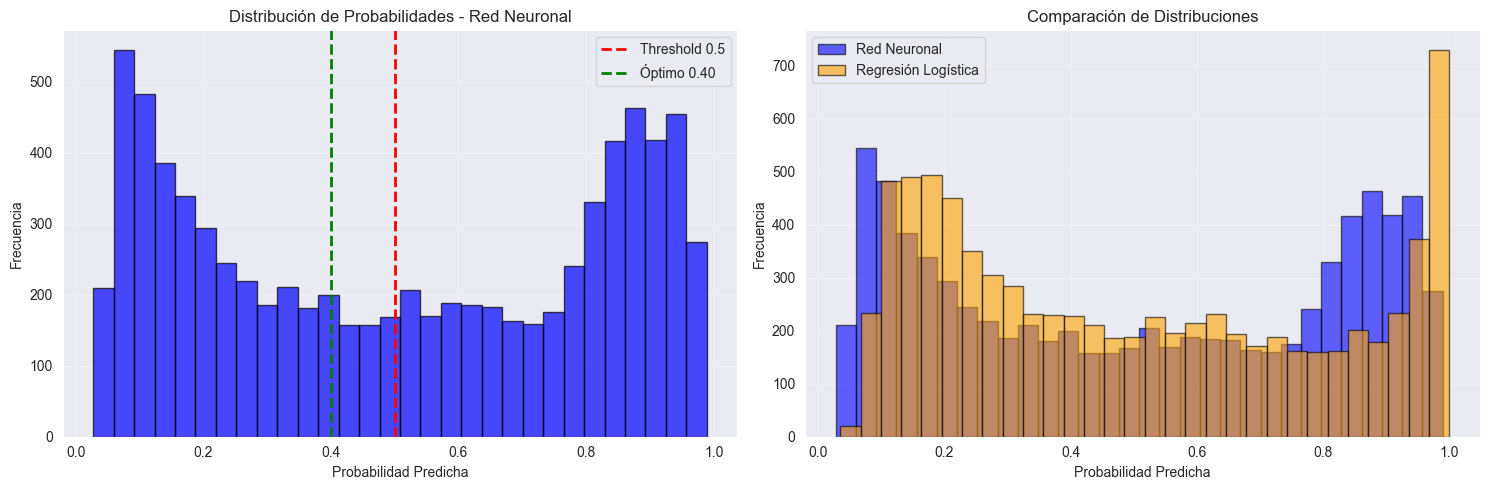

In [15]:
# 📊 VISUALIZACIÓN DE DISTRIBUCIONES
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribución de probabilidades de Red Neuronal
ax1.hist(y_proba_nn, bins=30, alpha=0.7, color='blue', edgecolor='black')
ax1.axvline(0.5, color='red', linestyle='--', linewidth=2, label='Threshold 0.5')
ax1.axvline(optimal_threshold, color='green', linestyle='--', linewidth=2,
            label=f'Óptimo {optimal_threshold:.2f}')
ax1.set_title('Distribución de Probabilidades - Red Neuronal')
ax1.set_xlabel('Probabilidad Predicha')
ax1.set_ylabel('Frecuencia')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Comparación de distribuciones
ax2.hist(y_proba_nn, bins=30, alpha=0.6, color='blue',
         label='Red Neuronal', edgecolor='black')
ax2.hist(y_proba_log, bins=30, alpha=0.6, color='orange',
         label='Regresión Logística', edgecolor='black')
ax2.set_title('Comparación de Distribuciones')
ax2.set_xlabel('Probabilidad Predicha')
ax2.set_ylabel('Frecuencia')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [16]:
# ✍️ RESUMEN EJECUTIVO FINAL
print("\n" + "="*70)
print("✍️ RESUMEN EJECUTIVO - ANÁLISIS DE MODELOS DE CRÉDITO")
print("="*70)

print(f"\n🏗️ ARQUITECTURA IMPLEMENTADA:")
print(f"   • Red Neuronal: {len(hidden_layers)} capas ocultas {hidden_layers}")
print(f"   • Activación: {activation.upper()} + {output_activation.upper()}")
print(f"   • Entrenamiento: {epochs} épocas, lr={learning_rate}")

print(f"\n🏆 RENDIMIENTO COMPARATIVO:")
print(f"   • Modelo ganador: {winner}")
print(f"   • Ventaja en F1-score: {f1_diff:.4f}")
print(f"   • Mayor diferencia en: {max_metric} ({max_diff:.4f})")

print(f"\n🎯 CONFIGURACIÓN ÓPTIMA:")
print(f"   • Umbral recomendado: {optimal_threshold:.2f}")
print(f"   • F1-score máximo: {max_f1:.4f}")
if abs(optimal_threshold - 0.5) > 0.1:
    print(f"   • Mejora vs 0.5: {(f1_difference/f1_05)*100:.1f}%")

print(f"\n💡 RECOMENDACIONES:")
if loss_gap > 0.1 or acc_gap > 0.05:
    print("   • Implementar early stopping para reducir sobreajuste")
    print("   • Considerar dropout o regularización L2")
print("   • Usar el umbral óptimo encontrado en producción")
print("   • Monitorear continuamente el rendimiento del modelo")

print(f"\n📈 MÉTRICAS CLAVE FINALES:")
print(f"   Red Neuronal    : F1={nn_metrics['F1-score']:.3f}, AUC={nn_metrics['ROC AUC']:.3f}")
print(f"   Reg. Logística  : F1={log_metrics['F1-score']:.3f}, AUC={log_metrics['ROC AUC']:.3f}")

print(f"\n🎯 CONCLUSIÓN:")
if winner == "Red Neuronal":
    print("   La red neuronal supera a la regresión logística, justificando")
    print("   la complejidad adicional para este problema de clasificación.")
else:
    print("   La regresión logística es competitiva, sugiriendo que el")
    print("   problema puede resolverse eficazmente con métodos lineales.")

print("\n" + "="*70)



✍️ RESUMEN EJECUTIVO - ANÁLISIS DE MODELOS DE CRÉDITO

🏗️ ARQUITECTURA IMPLEMENTADA:
   • Red Neuronal: 2 capas ocultas [64, 32]
   • Activación: RELU + SIGMOID
   • Entrenamiento: 20 épocas, lr=0.001

🏆 RENDIMIENTO COMPARATIVO:
   • Modelo ganador: Red Neuronal
   • Ventaja en F1-score: 0.0157
   • Mayor diferencia en: Recall (0.0490)

🎯 CONFIGURACIÓN ÓPTIMA:
   • Umbral recomendado: 0.40
   • F1-score máximo: 0.7908

💡 RECOMENDACIONES:
   • Usar el umbral óptimo encontrado en producción
   • Monitorear continuamente el rendimiento del modelo

📈 MÉTRICAS CLAVE FINALES:
   Red Neuronal    : F1=0.784, AUC=0.861
   Reg. Logística  : F1=0.768, AUC=0.858

🎯 CONCLUSIÓN:
   La red neuronal supera a la regresión logística, justificando
   la complejidad adicional para este problema de clasificación.

